__Порядковый номер 7=> будем рассматривать датасет о диабете__

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



In [4]:
data=pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


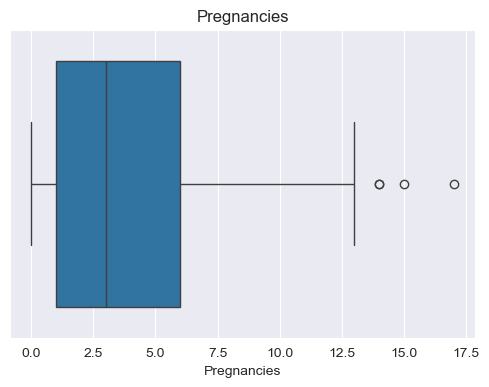

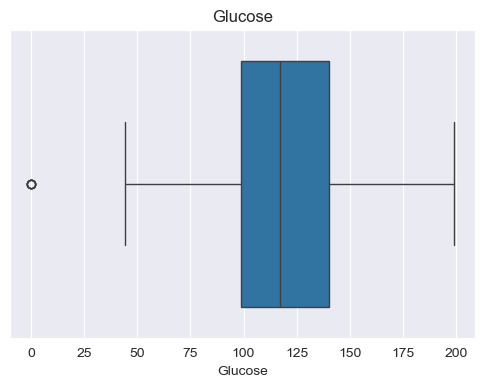

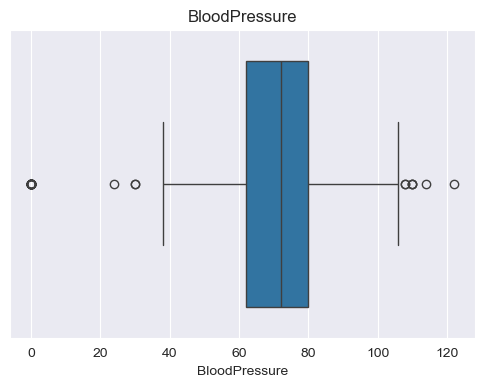

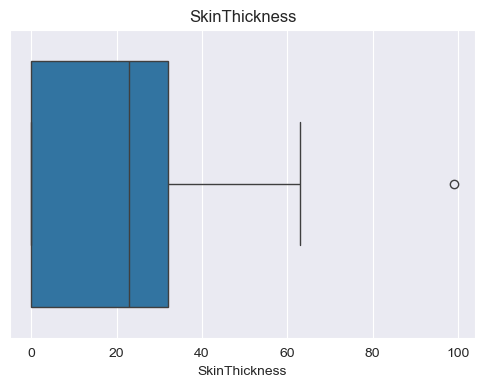

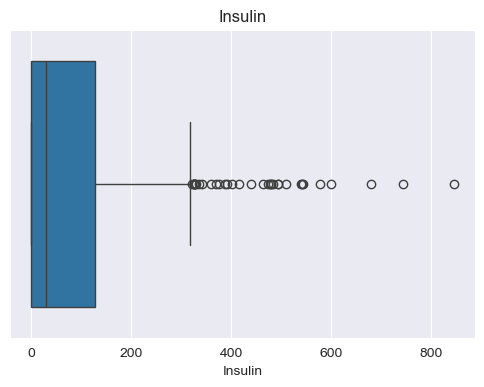

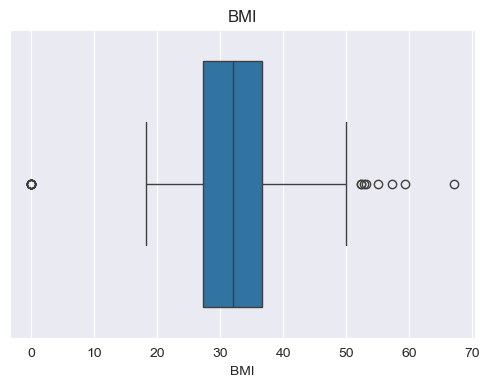

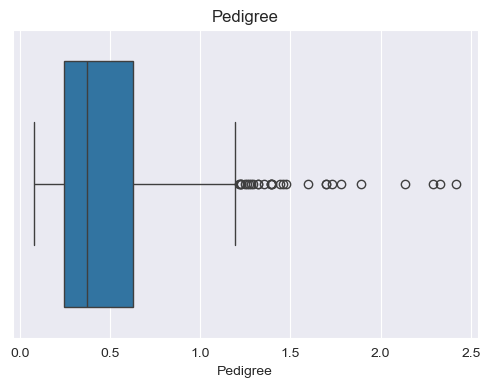

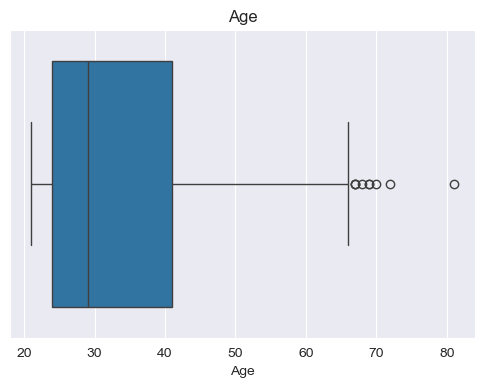

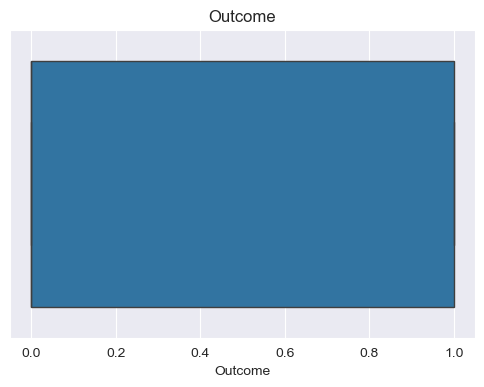

In [8]:
# Построение boxplot для каждого признака
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=column)
    plt.title(f'{column}')
    plt.show()

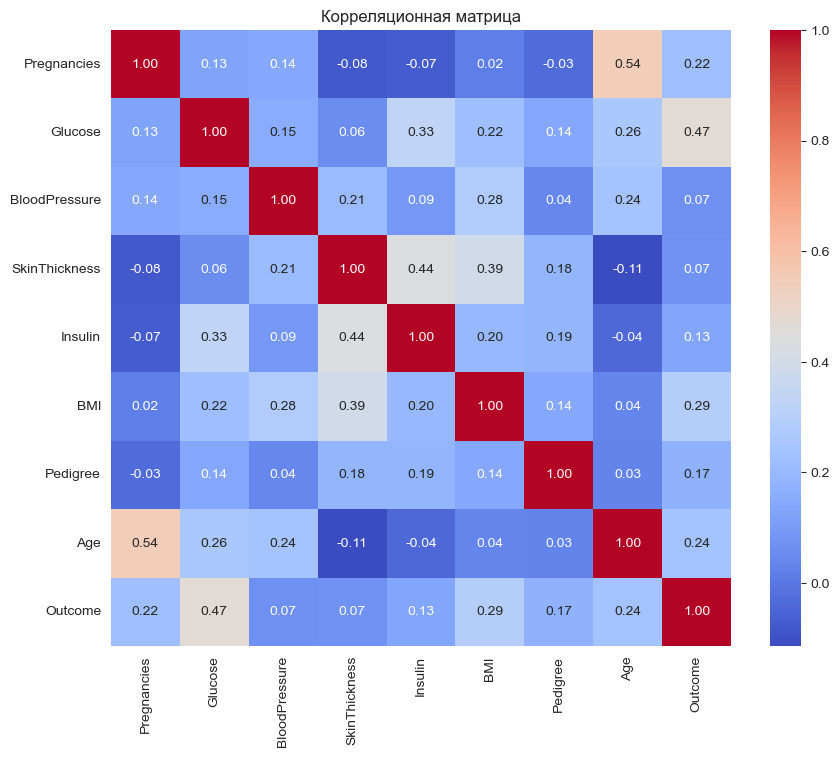

In [9]:
corr_matrix = data.corr()

# Строим тепловую карту корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Корреляционная матрица')
plt.show()

In [10]:
X=data.drop('Outcome', axis=1)
y=data['Outcome']
X=(X - X.mean()) / X.std()
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


In [11]:
# Выбор трех случайных признаков
random_columns = random.sample(list(X.columns), 3)

# Создание DataFrame для визуализации
df = X[random_columns].join(y)
df

,Pregnancies,Age,Pedigree,Outcome
0,0.639530,1.425067,0.468187,1
1,-0.844335,-0.190548,-0.364823,0
2,1.233077,-0.105515,0.604004,1
3,-0.844335,-1.040871,-0.920163,0
4,-1.141108,-0.020483,5.481337,1
...,...,...,...,...
763,1.826623,2.530487,-0.908090,0
764,-0.547562,-0.530677,-0.398023,0
765,0.342757,-0.275580,-0.684747,0
766,-0.844335,1.169970,-0.370859,1


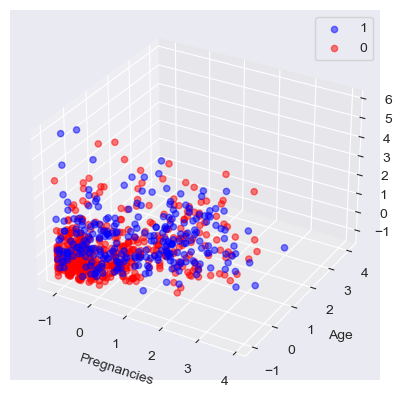

In [12]:

# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Цвета для разных классов
colors = {0: "red", 1: "blue"}

# Визуализация
for outcome in y.unique():
    subset = df[df['Outcome'] == outcome]
    ax.scatter(subset[random_columns[0]], subset[random_columns[1]], subset[random_columns[2]], 
               color=colors[outcome], label=f'{outcome}', alpha=0.5)

# Настройка графика
ax.set_xlabel(random_columns[0])
ax.set_ylabel(random_columns[1])
ax.set_zlabel(random_columns[2])
ax.legend()

# Показ графика
plt.show()

__Реализация KNN__

In [13]:
class MyKnn:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.to_numpy()]
        return np.array(predictions)

    def _predict(self, x):
        
        # Вычисляем расстояния до всех точек в обучающей выборке
        distances = np.linalg.norm(self.X_train.to_numpy() - x, axis=1)
        
        # Получаем индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]

        # Получаем классы ближайших соседей
        k_nearest_labels = self.y_train.iloc[k_indices]

        # Находим наиболее частый класс среди соседей
        most_common = k_nearest_labels.value_counts().idxmax()
        return most_common
    
    
    

__Функция для вывода результата__

In [14]:
def print_result(confusion_matrix_dict,accuracy_dict)->None:
    for i in confusion_matrix_dict.keys():
        print(f'При k={i} матрица ошибок: \n'
              f'{confusion_matrix_dict[i][0]} \n'
              f'{confusion_matrix_dict[i][1]}\n'
              f'Accuracy: {accuracy_dict[i]:.5f}\n')

__Функция для вычисления матрицы ошибок и точности при различных k__

In [15]:
def compute(X, y, k_values=(3, 5, 7, 11, 15)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy_dict={}
    confusion_matrix_dict={}
    for i in k_values:
        myKnn = MyKnn(k=i)
        myKnn.fit(X_train, y_train)
        y_pred = myKnn.predict(X_test)
        TP=np.sum((y_test== 1) & (y_pred == 1))
        TN=np.sum((y_test == 0) & (y_pred == 0))
        FP=np.sum((y_test == 0) & (y_pred == 1))
        FN=np.sum((y_test == 1) & (y_pred == 0))
        
        accuracy_dict[i] = (TP+TN)/(TP+TN+FP+FN)
        
        confusion_matrix_dict[i] = [[TP, FP], [FN, TN]]
    return accuracy_dict, confusion_matrix_dict
    

__Модель со случайными признаками__

In [16]:
random_features = np.random.choice(X.columns, 5, replace=False)
print(f'Используемые признаки: {', '.join(random_features)}')

# Выберите только случайные признаки из X
X_random = X[random_features]
accuracy_dict_random_feature, confusion_matrix_dict_random_feature = compute(X_random, y)
print_result(confusion_matrix_dict_random_feature,accuracy_dict_random_feature)

Используемые признаки: SkinThickness, Glucose, Pedigree, BMI, Age
При k=3 матрица ошибок: 
[34, 23] 
[21, 76]
Accuracy: 0.71429

При k=5 матрица ошибок: 
[33, 16] 
[22, 83]
Accuracy: 0.75325

При k=7 матрица ошибок: 
[36, 18] 
[19, 81]
Accuracy: 0.75974

При k=11 матрица ошибок: 
[36, 19] 
[19, 80]
Accuracy: 0.75325

При k=15 матрица ошибок: 
[36, 20] 
[19, 79]
Accuracy: 0.74675



__Модель с фиксированным набором признаков__

In [17]:
fixed_features = X.columns.tolist()
fixed_features.remove('Pregnancies')
print(f"Используемые признаки: {', '.join(fixed_features)}")
accuracy_dict_fixed_feature, confusion_matrix_dict_fixed_feature= compute(X[fixed_features], y)
print_result(confusion_matrix_dict_fixed_feature,accuracy_dict_fixed_feature)

Используемые признаки: Glucose, BloodPressure, SkinThickness, Insulin, BMI, Pedigree, Age
При k=3 матрица ошибок: 
[31, 23] 
[24, 76]
Accuracy: 0.69481

При k=5 матрица ошибок: 
[30, 19] 
[25, 80]
Accuracy: 0.71429

При k=7 матрица ошибок: 
[32, 19] 
[23, 80]
Accuracy: 0.72727

При k=11 матрица ошибок: 
[34, 18] 
[21, 81]
Accuracy: 0.74675

При k=15 матрица ошибок: 
[33, 19] 
[22, 80]
Accuracy: 0.73377

